## Detailed description of the data

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single dataset. On initial visual inspection of the data showed some missing values. As the datasets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo,Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model dataset. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors. 

## Description of each column

Life Expectancy (WHO): Statistical Analysis on factors influencing Life Expectancy
`Status`: Developed or Developing status \
`Life Expectancy`: Life Expectancy in age \
`Adult Mortality`: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population) \
`infant deaths`: Number of Infant Deaths per 1000 population \
`Alcohol`: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) \
`percentage expenditure`: Expenditure on health as a percentage of Gross Domestic Product per capita(%) \
measure of the proportion of a country’s total health expenditure that is spent on a particular individual or group. It is calculated as the total health expenditure for a particular individual or group divided by the country’s total health expenditure, multiplied by 100 \
`Hepatitis B`: (HepB) immunization coverage among 1-year-olds (%) \
`Measles`: Measles - number of reported cases per 1000 population \
`BMI`: Average Body Mass Index of entire population \
`under-five deaths`: Number of under-five deaths per 1000 population \
`polio`: Polio (Pol3) immunization coverage among 1-year-olds (%) \
`Total expenditure`: General government expenditure on health as a percentage of total government expenditure (%) \
`Diphtheria`: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%) \
`HIV/AIDS`: Deaths per 1 000 live births HIV/AIDS (0-4 years) \
`GDP`: Gross Domestic Product per capita (in USD) \
`Population`: Population of the country \
`thinness 1-19 years`: Prevalence of thinness among children and adolescents for Age 10 to 19 (% ) \
`thinness 5-9 years`: Prevalence of thinness among children for Age 5 to 9(%) \
`Income composition of resources`: Human Development Index in terms of income composition of resources (index ranging from 0 to 1) \
`Schooling`: Number of years of Schooling(years) 

In [1]:
#import needed libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,train_test_split
from xgboost import XGBRegressor
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from scipy import stats

In [2]:
# Reding the data
df = pd.read_csv('C:\Sohayb\jupyter\End-to-End Data Science Workshop\PROJECT\World-Health_Organization(WHO).csv')

In [3]:
pd.set_option('display.max_columns', None) #diplay all the columns
df.head()

Unnamed: 0                                Country  Year      Status  \
0        2737                                Ukraine  2008  Developing   
1         789                                Ecuador  2012  Developing   
2         707  Democratic People's Republic of Korea  2013  Developing   
3         424                                Burundi  2007  Developing   
4          69                    Antigua and Barbuda  2010  Developing   

   Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0              67.7            273.0              5     9.46   
1              75.5            127.0              7     3.92   
2              71.0            146.0              6     3.35   
3              54.8            355.0             24     4.54   
4              75.6            138.0              0     7.84   

   percentage expenditure  Hepatitis B  Measles    BMI   under-five deaths   \
0              456.458666         84.0        48   57.6                   6   
1               41.880877         88.0        72   52.1                   8   
2                0.000000         93.0         0   31.8                   8   
3                1.726595         99.0        43   14.8                  36   
4             1983.956937         98.0         0   44.4                   0   

   Polio  Total expenditure  Diphtheria    HIV/AIDS          GDP  Population  \
0   91.0               6.63          9.0        0.4   3891.37823    462582.0   
1   85.0               6.48         87.0        0.1    572.14313  15419666.0   
2   99.0                NaN         93.0        0.1          NaN         NaN   
3   93.0               1.30         99.0        3.4     17.79995   7939573.0   
4   99.0               5.63         98.0        0.1  12126.87614         NaN   

    thinness  1-19 years   thinness 5-9 years  \
0                    2.5                  2.6   
1                    1.3                  1.2   
2                    5.0                  5.0   
3                    8.0                  8.0   
4                    3.3                  3.3   

   Income composition of resources  Schooling  
0                            0.730       14.9  
1                            0.717       13.3  
2                              NaN        NaN  
3                            0.309        7.2  
4                            0.783       14.1

## Description of the data

In [4]:
#drop unneccessary columns
df.drop(['Unnamed: 0'],axis=1, inplace=True)

In [5]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

There are 2203 observations and 22 features in this dataset. 



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2203 entries, 0 to 2202
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2203 non-null   object 
 1   Year                             2203 non-null   int64  
 2   Status                           2203 non-null   object 
 3   Life expectancy                  2196 non-null   float64
 4   Adult Mortality                  2196 non-null   float64
 5   infant deaths                    2203 non-null   int64  
 6   Alcohol                          2057 non-null   float64
 7   percentage expenditure           2203 non-null   float64
 8   Hepatitis B                      1799 non-null   float64
 9   Measles                          2203 non-null   int64  
 10   BMI                             2177 non-null   float64
 11  under-five deaths                2203 non-null   int64  
 12  Polio               

There is 14 columns with missing values

In [7]:
df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2203.000000       2196.000000      2196.000000    2203.000000   
mean   2007.569224         69.345355       165.155282      28.615978   
std       4.591397          9.526132       124.462742     110.757132   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.300000        74.000000       0.000000   
50%    2008.000000         72.200000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      21.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2057.000000             2203.000000  1799.000000    2203.000000   
mean      4.598799              719.316045    81.183435    2348.684521   
std       4.041087             1961.603898    24.791763   11839.626538   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.850000                5.667245    77.000000       0.000000   
50%       3.770000               66.729339    92.000000      16.000000   
75%       7.680000              439.527313    97.000000     366.500000   
max      17.310000            19099.045060    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2177.000000         2203.000000  2192.000000        2032.000000   
mean     38.471796           39.952338    82.750912           5.930000   
std      20.154119          152.196223    23.306091           2.502456   
min       1.400000            0.000000     3.000000           0.650000   
25%      19.300000            0.000000    78.000000           4.240000   
50%      43.900000            4.000000    93.000000           5.730000   
75%      56.200000           26.000000    97.000000           7.500000   
max      87.300000         2500.000000    99.000000          17.200000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2192.000000  2203.000000    1878.000000  1.719000e+03   
mean     82.384580     1.758284    7346.589043  1.204519e+07   
std      23.818889     5.179996   14207.605138  5.619197e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     469.289582  1.947545e+05   
50%      93.000000     0.100000    1814.990896  1.425453e+06   
75%      97.000000     0.750000    5873.386491  7.494542e+06   
max      99.000000    50.600000  115761.577000  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2177.000000          2177.000000   
mean                4.814424             4.865319   
std                 4.391639             4.483311   
min                 0.100000             0.100000   
25%                 1.600000             1.600000   
50%                 3.300000             3.300000   
75%                 7.100000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2079.000000  2080.000000  
mean                          0.631381    12.044471  
std                           0.207114     3.320415  
min                           0.000000     0.000000  
25%                           0.496000    10.200000  
50%                           0.682000    12.400000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

There are outliers in the `infant deaths`, `Measles` and `under-five deaths` columns (maximum should be 1000) but found `1800`, `212183`, and `2500` accordingly \
and there are outliers in `percentage expenditure` because it should represent a percantage so the maximum value should be 100% so we will drop it in the cleaning phase\
There is something unreasonable `BMI` column because range of the obesity should be between about 15 to 40 but most of the values in the column are above 42 so we will drop the whole column

In [75]:
#look more closely about the values and their counts in each column
#pd.set_option('display.max_rows', None) # display all the unique values result from value_counts
for col in df.columns:
    print("\n************ "+col+" ************")   
    print('\n', df[col].value_counts(), '\n')
    print('\n', df[col].describe(), '\n')


************ Country ************

 Country
Costa Rica                    16
Hungary                       16
Rwanda                        15
Botswana                      15
Colombia                      15
                              ..
Armenia                        9
Belarus                        9
Iran (Islamic Republic of)     8
Kenya                          8
Montenegro                     8
Name: count, Length: 171, dtype: int64 


 count           2047
unique           171
top       Costa Rica
freq              16
Name: Country, dtype: object 


************ Year ************

 Year
2007    135
2006    133
2008    132
2001    131
2005    131
2012    131
2011    129
2009    128
2010    128
2014    128
2015    128
2013    127
2003    125
2000    123
2004    122
2002    116
Name: count, dtype: int64 


 count    2047.000000
mean     2007.555447
std         4.581053
min      2000.000000
25%      2004.000000
50%      2008.000000
75%      2012.000000
max      2015.000000
Name:

## Basic Cleaning

In [9]:
#show column name
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

There are columns have leading and trailing spaces so we will rename the columns

In [10]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('-', '_')

#check if the column names updated
print(df.columns)

print('\n#################################################\n')
"""
#rename the columns
df.rename(columns = {" BMI " :"BMI", 
                                  "Life expectancy ": "Life_expectancy",
                                  "Adult Mortality":"Adult_mortality",
                                  "infant deaths":"Infant_deaths",
                                  "percentage expenditure":"Percentage_expenditure",
                                  "Hepatitis B":"HepatitisB",
                                  "Measles ":"Measles",
                                  "under-five deaths ": "Under_five_deaths",
                                  "Total expenditure":"Total_expenditure",
                                  "Diphtheria ": "Diphtheria",
                                  " thinness  1-19 years":"Thinness_1-19_years",
                                  " thinness 5-9 years":"Thinness_5-9_years",
                                  " HIV/AIDS":"HIV/AIDS",
                                  "Income composition of resources":"Income_composition_of_resources"}, inplace = True)
"""                                  

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness__1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

#################################################



'\n#rename the columns\ndf.rename(columns = {" BMI " :"BMI", \n                                  "Life expectancy ": "Life_expectancy",\n                                  "Adult Mortality":"Adult_mortality",\n                                  "infant deaths":"Infant_deaths",\n                                  "percentage expenditure":"Percentage_expenditure",\n                                  "Hepatitis B":"HepatitisB",\n                                  "Measles ":"Measles",\n                                  "under-five deaths ": "Under_five_deaths",\n                                  "Total expenditure":"Total_expenditure",\n                                  "Diphtheria ": "Diphtheria",\n                                  " thinness  1-19 years":"Thinness_1-19_years",\n                                  " thinness 5-9 years":"Thinness_5-9_years",\n                                  " HIV/AIDS":"HIV/AIDS",\n                                  "Income composition of resources":"Income_com

In [11]:
#number of duplicates
df.duplicated().sum()

0

In [12]:
#number of null values
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                      7
Adult_Mortality                      7
infant_deaths                        0
Alcohol                            146
percentage_expenditure               0
Hepatitis_B                        404
Measles                              0
BMI                                 26
under_five_deaths                    0
Polio                               11
Total_expenditure                  171
Diphtheria                          11
HIV/AIDS                             0
GDP                                325
Population                         484
thinness__1_19_years                26
thinness_5_9_years                  26
Income_composition_of_resources    124
Schooling                          123
dtype: int64

As we said before that there are 14 columns with missing values

## Handling the missing data
### we will deal with the missing data as next: 
* any column has less than or equal 5 percent we will drop the missing values from it
* if the column has more than 5 percent of missing values we will use the imputation
* but if the column has a lot of missing values we will drop the column itself

In [13]:
#get the threshold (5%)
threshold = len(df) * 0.05
threshold

110.15

In [14]:
#Bring all the columns that have 5% or less of missing values 
cols_with_5perc_or_less = df.columns[(df.isna().sum()  > 0) & (df.isna().sum() <= threshold)]
print(cols_with_5perc_or_less, '\n')

print('There are {} columns the count of their missing values less than 5% of the data\n'.format(len(cols_with_5perc_or_less)))

df.dropna(subset = list(cols_with_5perc_or_less), inplace = True)

print('the number of remaining columns is {}'.format(df.columns[df.isna().sum() != 0]))

Index(['Life_expectancy', 'Adult_Mortality', 'BMI', 'Polio', 'Diphtheria',
       'thinness__1_19_years', 'thinness_5_9_years'],
      dtype='object') 

There are 7 columns the count of their missing values less than 5% of the data

the number of remaining columns is Index(['Alcohol', 'Hepatitis_B', 'Total_expenditure', 'GDP', 'Population',
       'Income_composition_of_resources', 'Schooling'],
      dtype='object')


In [15]:
#show the columns that still have missing values
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                      0
Adult_Mortality                      0
infant_deaths                        0
Alcohol                            131
percentage_expenditure               0
Hepatitis_B                        386
Measles                              0
BMI                                  0
under_five_deaths                    0
Polio                                0
Total_expenditure                  161
Diphtheria                           0
HIV/AIDS                             0
GDP                                315
Population                         478
thinness__1_19_years                 0
thinness_5_9_years                   0
Income_composition_of_resources    120
Schooling                          120
dtype: int64

In [16]:
#show the percentage of the missing values of the remaining columns
df.isna().sum()[df.isna().sum() != 0] / len(df) * 100

Alcohol                             6.045224
Hepatitis_B                        17.812644
Total_expenditure                   7.429626
GDP                                14.536225
Population                         22.058145
Income_composition_of_resources     5.537610
Schooling                           5.537610
dtype: float64

as you can see there are two columns that has percentage of missing values that is `very close` to the 5% so we can drop the missing values in this case too.

In [17]:
df.dropna(subset = ['Income_composition_of_resources', 'Schooling'], inplace = True)

In [18]:
df.isna().sum()[df.isna().sum() != 0] / len(df) * 100

Alcohol               6.057645
Hepatitis_B          17.147044
Total_expenditure     6.301905
GDP                   9.672692
Population           17.489008
dtype: float64

In [19]:
#drop the columns with many missing values
df.drop(['Hepatitis_B', 'GDP', 'Population'], axis = 1, inplace = True)

In [20]:
#show the remaining columns that still have missing values
df.isna().sum()[df.isna().sum() != 0]

Alcohol              124
Total_expenditure    129
dtype: int64

In [21]:
df[['Alcohol', 'Total_expenditure']].describe()

Alcohol  Total_expenditure
count  1923.000000        1918.000000
mean      4.537514           5.869505
std       4.001077           2.382209
min       0.010000           0.650000
25%       0.810000           4.252500
50%       3.780000           5.710000
75%       7.490000           7.467500
max      17.310000          14.390000

Should i remove the outliers first then impute the missing values or vice versa? 
* As you see there is no extreme values that can distort the imputation so we will impute the missing data before removing the outliers
* and for more caution we will impute the missing values with the median not the mean 

In [22]:
#impute the missing values with median
df['Alcohol'].fillna(df['Alcohol'].median(), inplace = True)
df['Total_expenditure'].fillna(df['Total_expenditure'].median(), inplace = True)

In [23]:
df.isna().sum()

Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Measles                            0
BMI                                0
under_five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
thinness__1_19_years               0
thinness_5_9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

### Finally we have removed all the missing values from our data

In [24]:
print('the shape of the dataframe after handling the missing values {}'.format(df.shape))

the shape of the dataframe after handling the missing values (2047, 19)


In [25]:
df.head()

Country  Year      Status  Life_expectancy  Adult_Mortality  \
0              Ukraine  2008  Developing             67.7            273.0   
1              Ecuador  2012  Developing             75.5            127.0   
3              Burundi  2007  Developing             54.8            355.0   
4  Antigua and Barbuda  2010  Developing             75.6            138.0   
5              Denmark  2008   Developed             78.8             88.0   

   infant_deaths  Alcohol  percentage_expenditure  Measles   BMI  \
0              5     9.46              456.458666       48  57.6   
1              7     3.92               41.880877       72  52.1   
3             24     4.54                1.726595       43  14.8   
4              0     7.84             1983.956937        0  44.4   
5              0    10.70            10761.182090       14  56.3   

   under_five_deaths  Polio  Total_expenditure  Diphtheria  HIV/AIDS  \
0                  6   91.0               6.63         9.0       0.4   
1                  8   85.0               6.48        87.0       0.1   
3                 36   93.0               1.30        99.0       3.4   
4                  0   99.0               5.63        98.0       0.1   
5                  0   88.0               1.18        88.0       0.1   

   thinness__1_19_years  thinness_5_9_years  Income_composition_of_resources  \
0                   2.5                 2.6                            0.730   
1                   1.3                 1.2                            0.717   
3                   8.0                 8.0                            0.309   
4                   3.3                 3.3                            0.783   
5                   1.1                 0.9                            0.906   

   Schooling  
0       14.9  
1       13.3  
3        7.2  
4       14.1  
5       16.8

## Handling the outliers

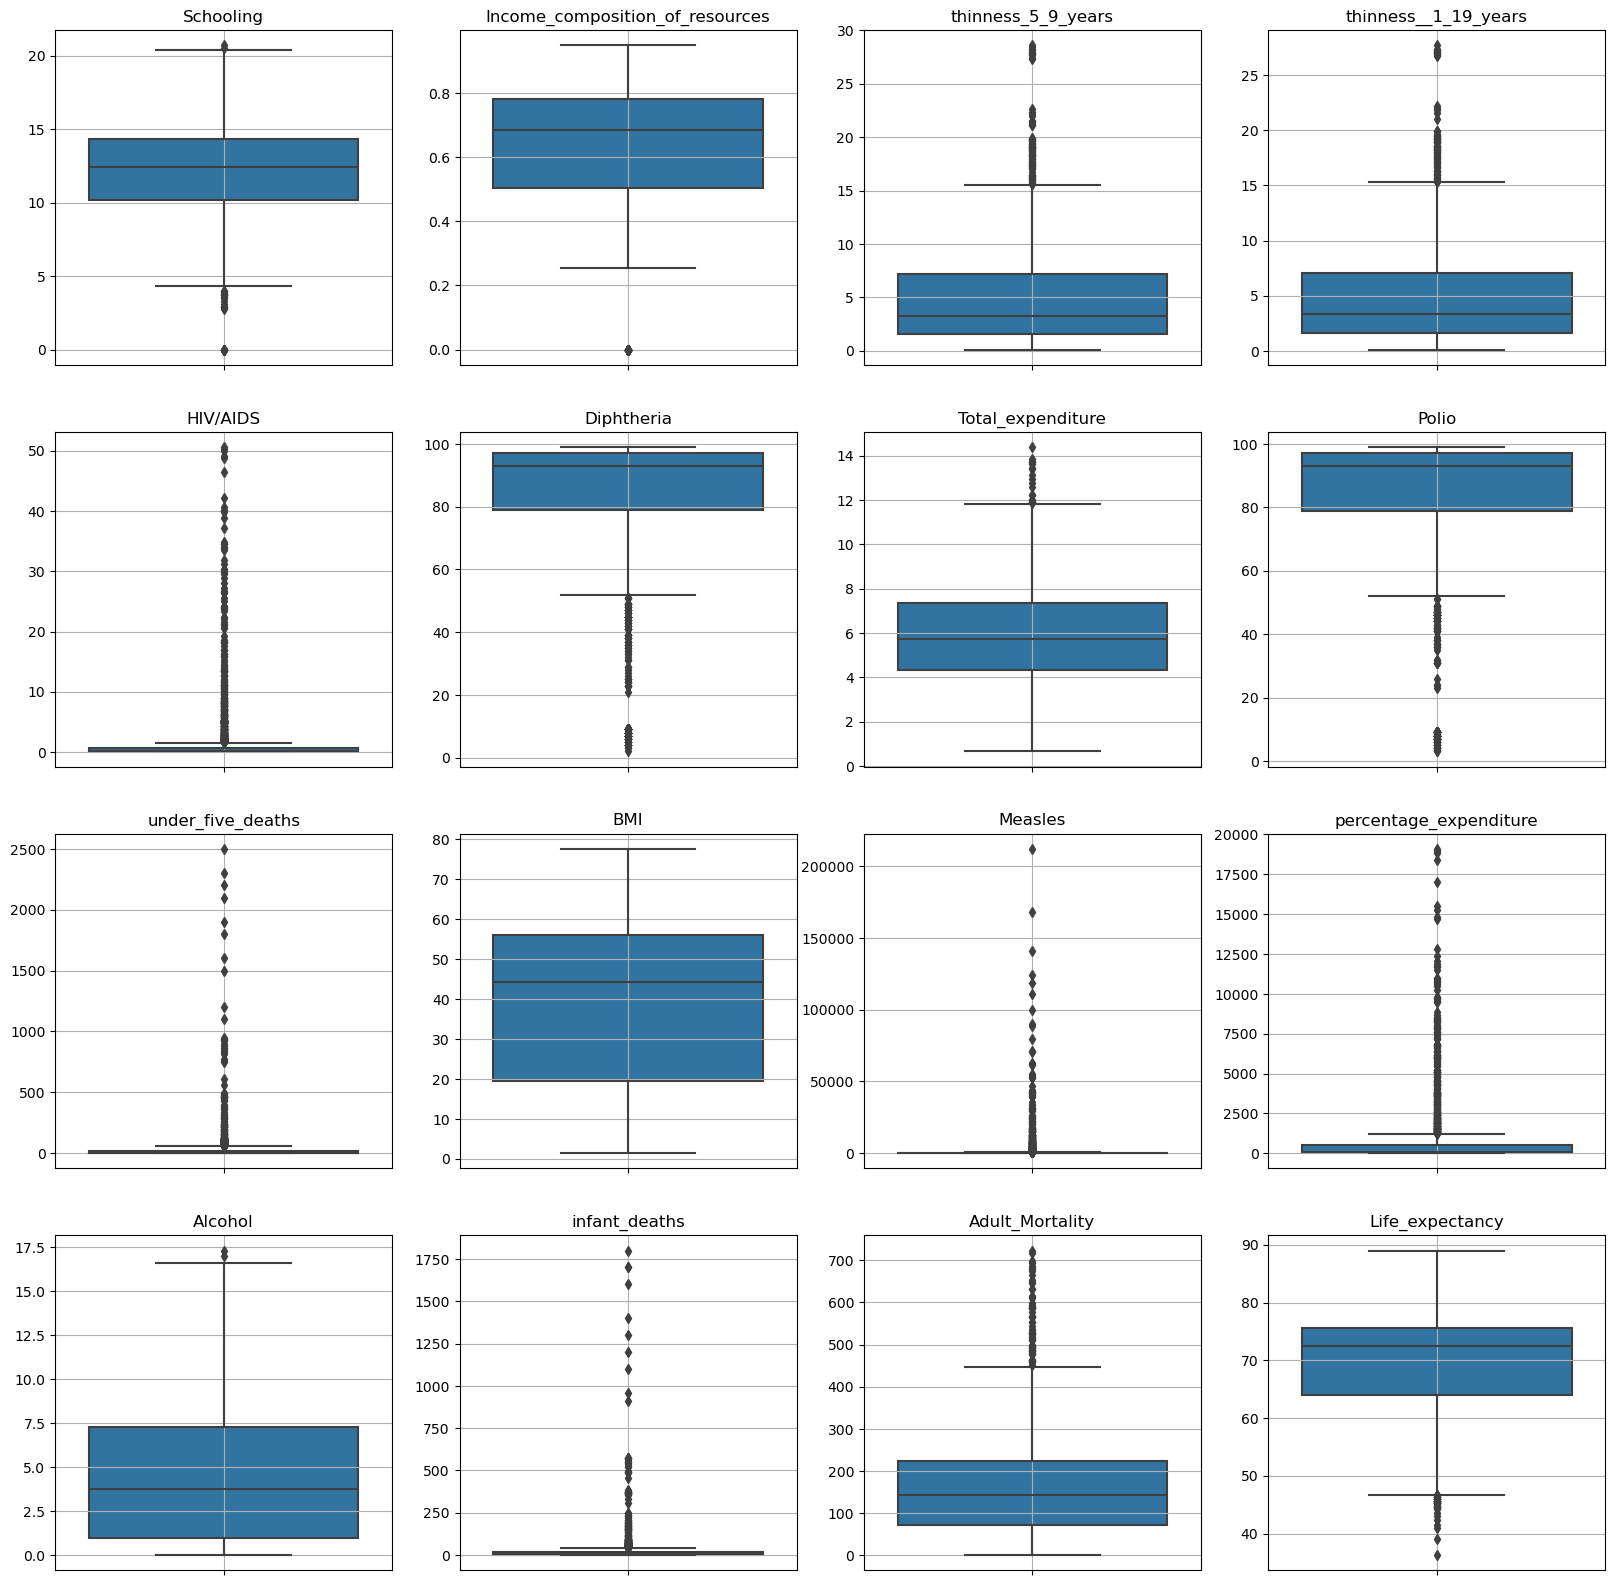

In [26]:
#Create a function to plot the boxplots
def plot_boxplot(col_names):
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20,20))
    counter = 0
    for i in range(4):   
        for j in range(4):
            if len(numerical_cols_to_plot) > 0:
                col_name = numerical_cols_to_plot.pop()   
            else:
                break
            sns.boxplot(ax = axes[i,j], y = df[col_name])
            axes[i,j].set_title(col_name)
            axes[i, j].set_ylabel(None)
            axes[i,j].grid(True)

#select the numerical columns to plot their boxplot
numerical_cols_to_plot = list(df.columns)[3:]
plot_boxplot(numerical_cols_to_plot)

In [27]:
#any value more than 100 in the percantage_expendature column considered as outlier because the column represent a percantage so the maximum value should be 100%
print('percantage of outliers(values more than 100) in the (percentage_expenditure) column ({})'.format(len(df[df['percentage_expenditure']>100]) / len(df)))

percantage of outliers(values more than 100) in the (percentage_expenditure) column (0.47435271128480705)


So 47% of the values in `percentage_expenditure` column are considered as outliers so we will drop this column

In [28]:
df.drop(['percentage_expenditure'], axis=1, inplace = True)

In [29]:
print('percantage of outliers(values more than 100) in the (Measles) column {}'.format(len(df[df['Measles']>100]) / len(df)))

percantage of outliers(values more than 100) in the (Measles) column 0.3434294088910601


So 34% of the values in Measles column are considered as outliers so we will drop this column

In [30]:
df.drop(['Measles'], axis=1, inplace = True)

As we said before There is something unreasonable `BMI` column because range of the obesity should be between about 15 to 40 but most of the values in the column are above 42 so we will drop the whole column 

In [31]:
df.drop(['BMI'], axis=1, inplace = True)

There are another two columns that maximum values should be 1000 because they are columns represent number of people infected by some disease per 1000 population
these columns are `infant_deaths`,and `under_five_deaths` 

Let's first explore how many values are more than 1000

In [32]:
print('number of values greater than 1000 in (infant_deaths) column are: {}'.format(len(df[df['infant_deaths'] > 1000])))
print('number of values greater than 1000 in (under_five_deaths) column are: {}'.format(len(df[df['under_five_deaths'] > 1000])))

number of values greater than 1000 in (infant_deaths) column are: 8
number of values greater than 1000 in (under_five_deaths) column are: 10


Because the values that are bigger than 1000 in these columns are not reasonable so we will replace them with the median

In [33]:
#print the most 15 biggest value in each column of the three
print(sorted(df['infant_deaths'])[2032:])
print(sorted(df['under_five_deaths'])[2032:])

[556, 567, 571, 574, 576, 910, 957, 1100, 1200, 1300, 1400, 1600, 1700, 1700, 1800]
[893, 918, 928, 936, 943, 1100, 1200, 1500, 1600, 1800, 1900, 2100, 2200, 2300, 2500]


In [34]:
df.loc[df['infant_deaths'] > 1000, 'infant_deaths'] = df['infant_deaths'].median()
df.loc[df['under_five_deaths'] > 1000, 'under_five_deaths'] = df['under_five_deaths'].median()

In [35]:
print('number of values greater than 1000 in (infant_deaths) column are: {}'.format(len(df[df['infant_deaths'] > 1000])))
print('number of values greater than 1000 in (under_five_deaths) column are: {}'.format(len(df[df['under_five_deaths'] > 1000])))

number of values greater than 1000 in (infant_deaths) column are: 0
number of values greater than 1000 in (under_five_deaths) column are: 0


Now we can apply the winsorization of all the remaining columns that have outliers

In [36]:
#Create a function to plot some columns
def plot_boxplot_for_some_cols(col_names, num_cols):
    fig, axes = plt.subplots(nrows = 1, ncols = num_cols, figsize=(15,5))
    for i in range(num_cols):
        col_name = col_names[0+i]
        sns.boxplot(ax = axes[i], y = df[col_name])
        axes[i].set_title(col_name)
        axes[i].set_ylabel(None)
        axes[i].grid(True)

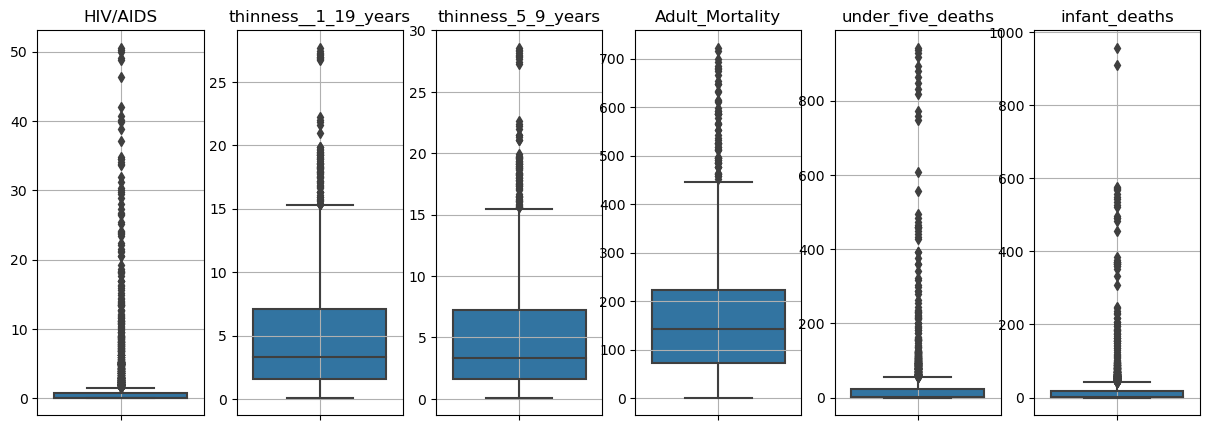

In [37]:
upper_outliers_cols = ['HIV/AIDS', 'thinness__1_19_years', 'thinness_5_9_years', 'Adult_Mortality', 'under_five_deaths', 'infant_deaths']
num_of_cols = len(upper_outliers_cols)
#call the function
plot_boxplot_for_some_cols(upper_outliers_cols, num_of_cols)

Because of the outliers in columns `HIV/AIDS`, `thinness__1_19_years`, `thinness_5_9_years`, `Adult_Mortality`, `under_five_deaths`, and `infant_deaths` are all above (q3 + 1.5 IQR) (above the whisker from the boxplot) so we will apply the winsorization method on them and we will focus on the upper limit but the lower limit will be zero 

In [38]:
df['HIV/AIDS'] = winsorize(df['HIV/AIDS'], limits = [0.0, 0.15])
df['thinness__1_19_years'] = winsorize(df['thinness__1_19_years'], limits = [0.0, 0.05])
df['thinness_5_9_years'] = winsorize(df['thinness_5_9_years'], limits = [0.0, 0.05])
df['Adult_Mortality'] = winsorize(df['Adult_Mortality'], limits = [0.0, 0.05])
df['under_five_deaths'] = winsorize(df['under_five_deaths'], limits = [0.0, 0.10])
df['infant_deaths'] = winsorize(df['infant_deaths'], limits = [0.0, 0.10])

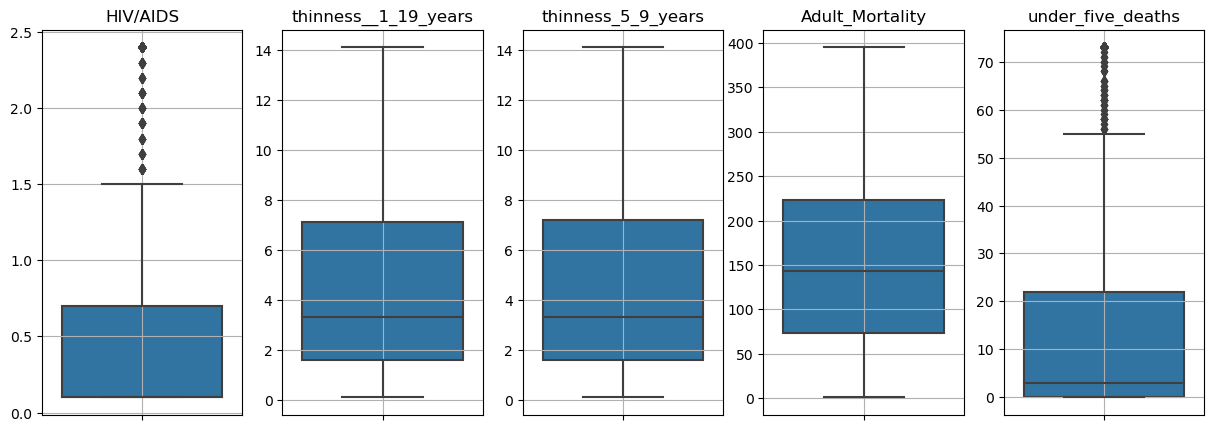

In [39]:
upper_outliers_cols = ['HIV/AIDS', 'thinness__1_19_years', 'thinness_5_9_years', 'Adult_Mortality', 'under_five_deaths']
num_of_cols = len(upper_outliers_cols)
#call the function
plot_boxplot_for_some_cols(upper_outliers_cols, num_of_cols)

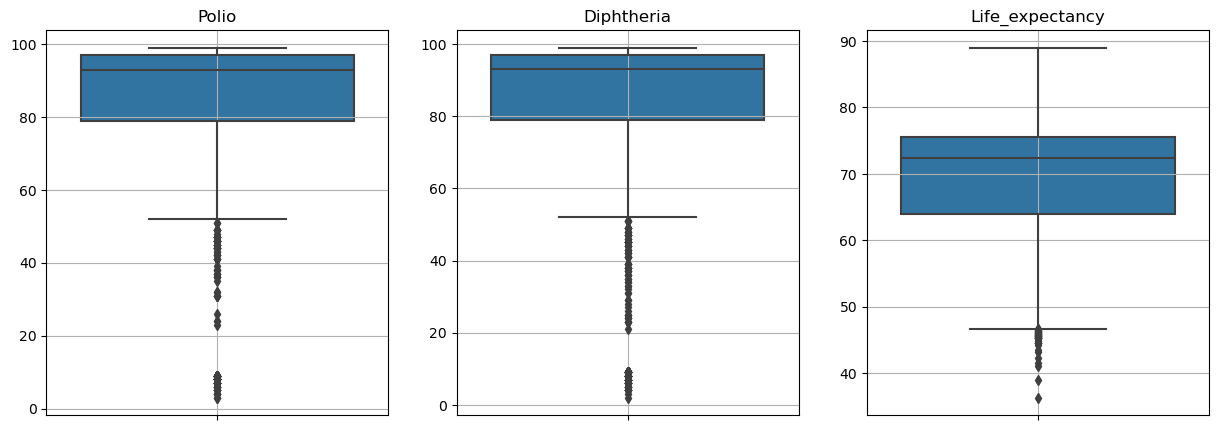

In [40]:
lower_outliers_cols = ['Polio', 'Diphtheria', 'Life_expectancy']
num_of_cols = len(lower_outliers_cols)
#call the function
plot_boxplot_for_some_cols(lower_outliers_cols, num_of_cols)

Because of the outliers in columns `Polio`, `Diphtheria`, and `Life_expectancy`  are all below (q1 - 1.5 IQR) (below the whisker from the boxplot) so we will apply the winsorization method on them and we will focus on the upper limit but the lower limit will be zero 

In [41]:
df['Polio'] = winsorize(df['Polio'], limits = [0.10, 0.0])
df['Diphtheria'] = winsorize(df['Diphtheria'], limits = [0.10, 0.0])
df['Life_expectancy'] = winsorize(df['Life_expectancy'], limits = [0.04, 0.0])

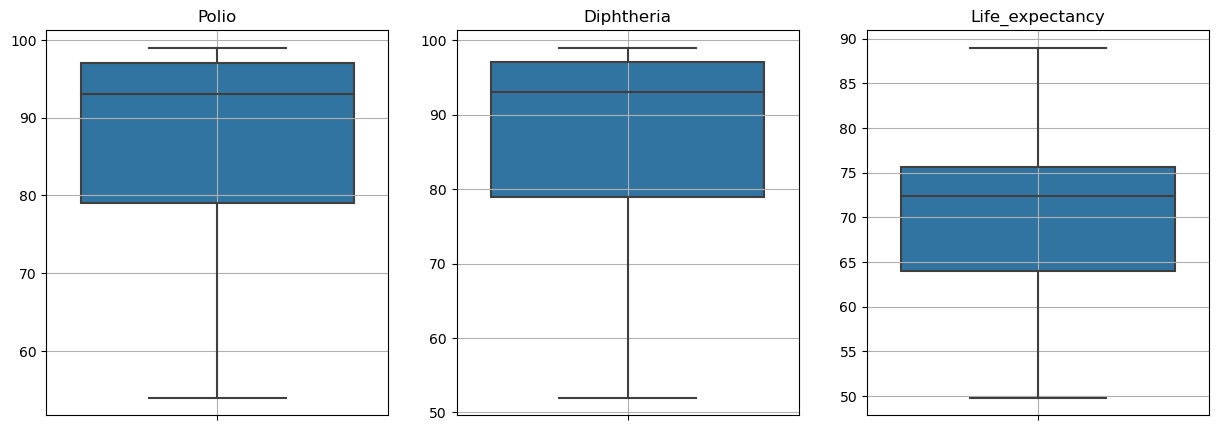

In [42]:
lower_outliers_cols = ['Polio', 'Diphtheria', 'Life_expectancy']
num_of_cols = len(lower_outliers_cols)
#call the function
plot_boxplot_for_some_cols(lower_outliers_cols, num_of_cols)

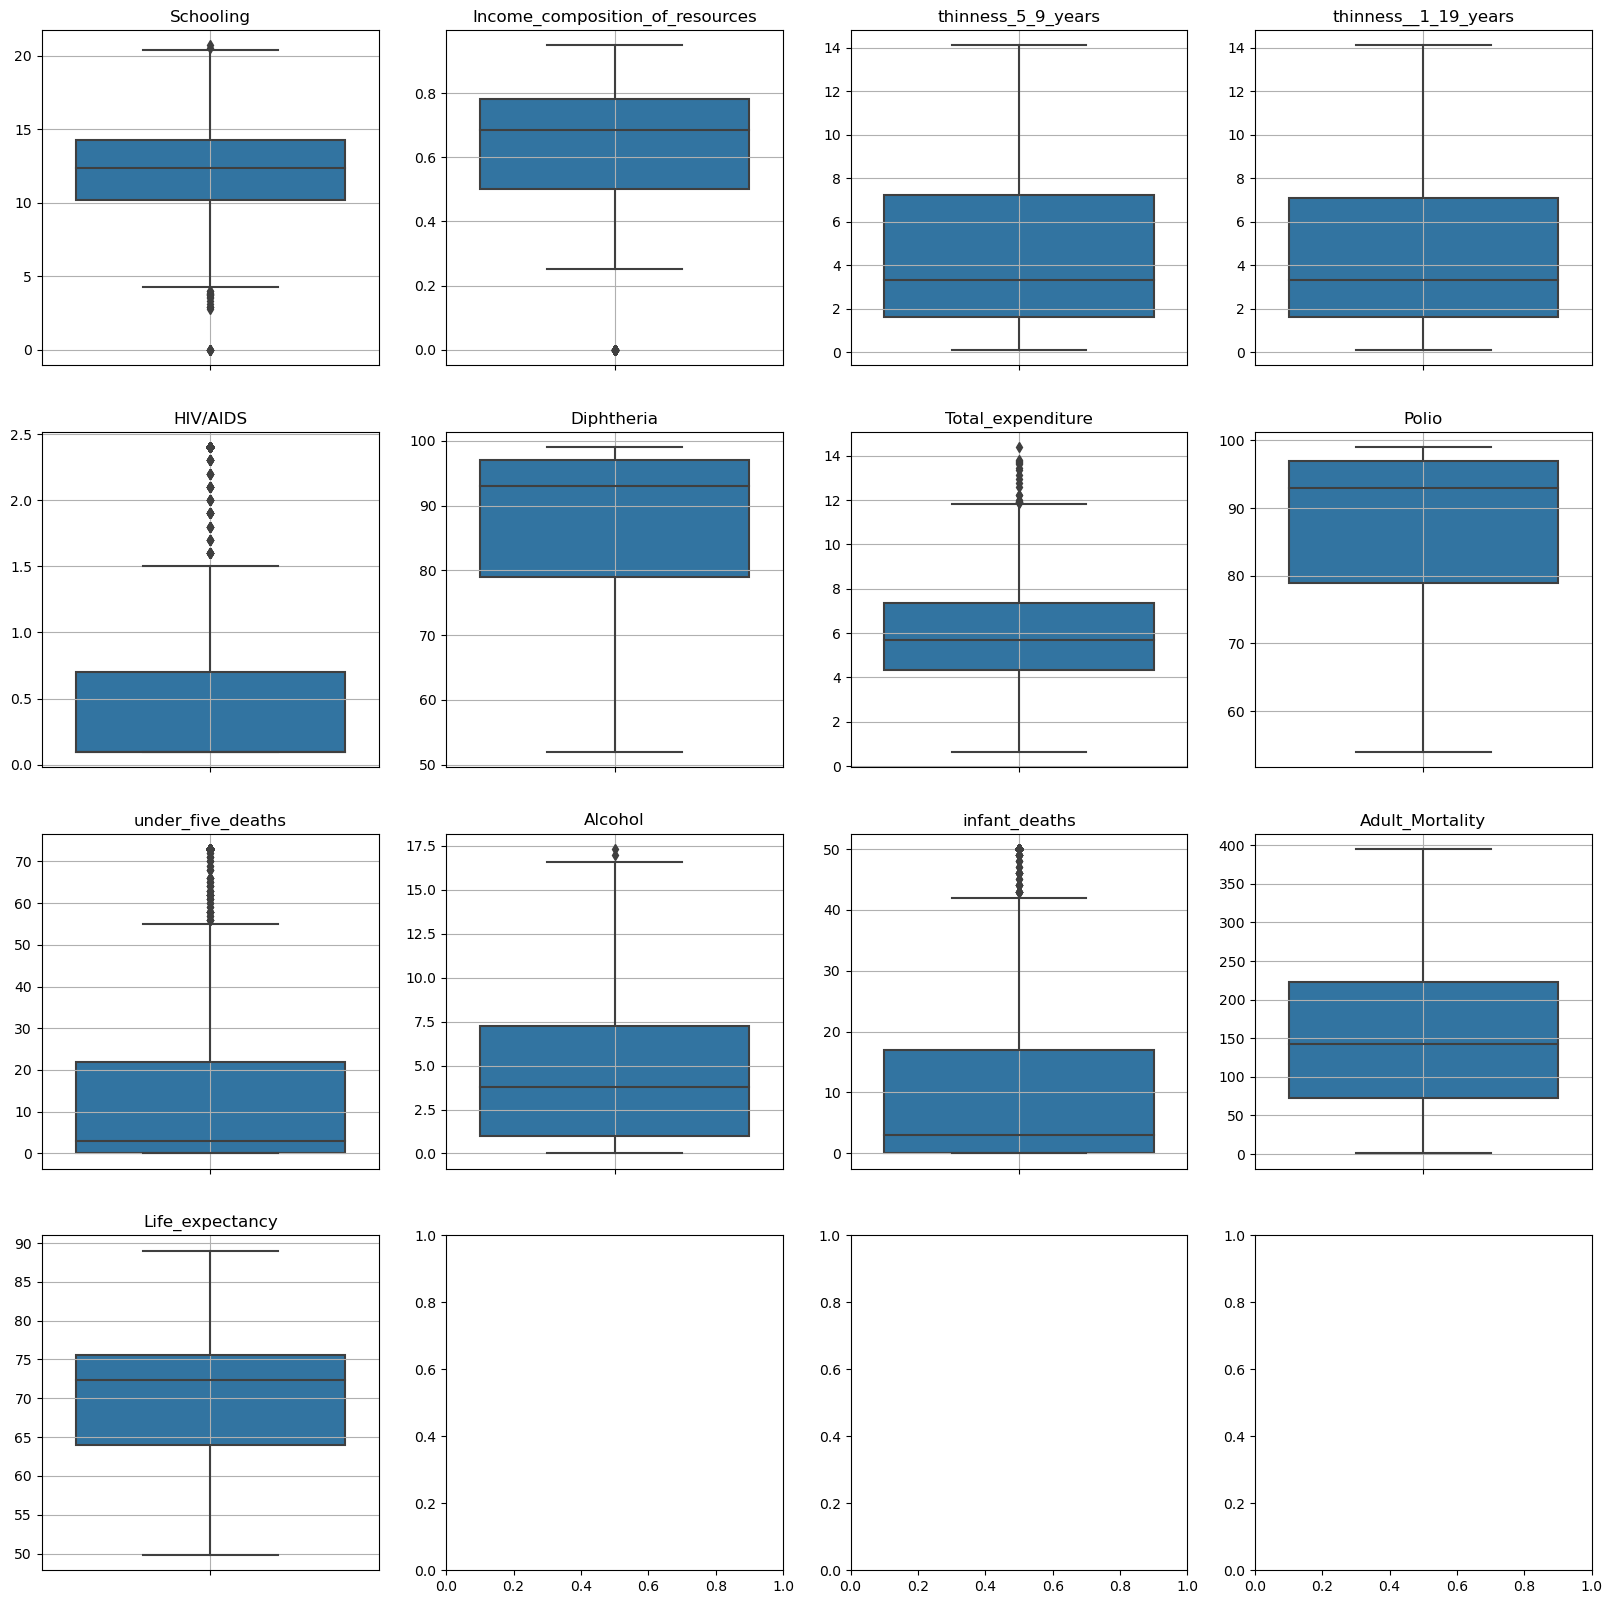

In [43]:
numerical_cols_to_plot = list(df.columns)[3:]
plot_boxplot(numerical_cols_to_plot)

In [44]:
print('number of rows and columns after the cleaning process {}'.format(df.shape))

number of rows and columns after the cleaning process (2047, 16)


### Finally we have done all the cleaning let's begin the visualization

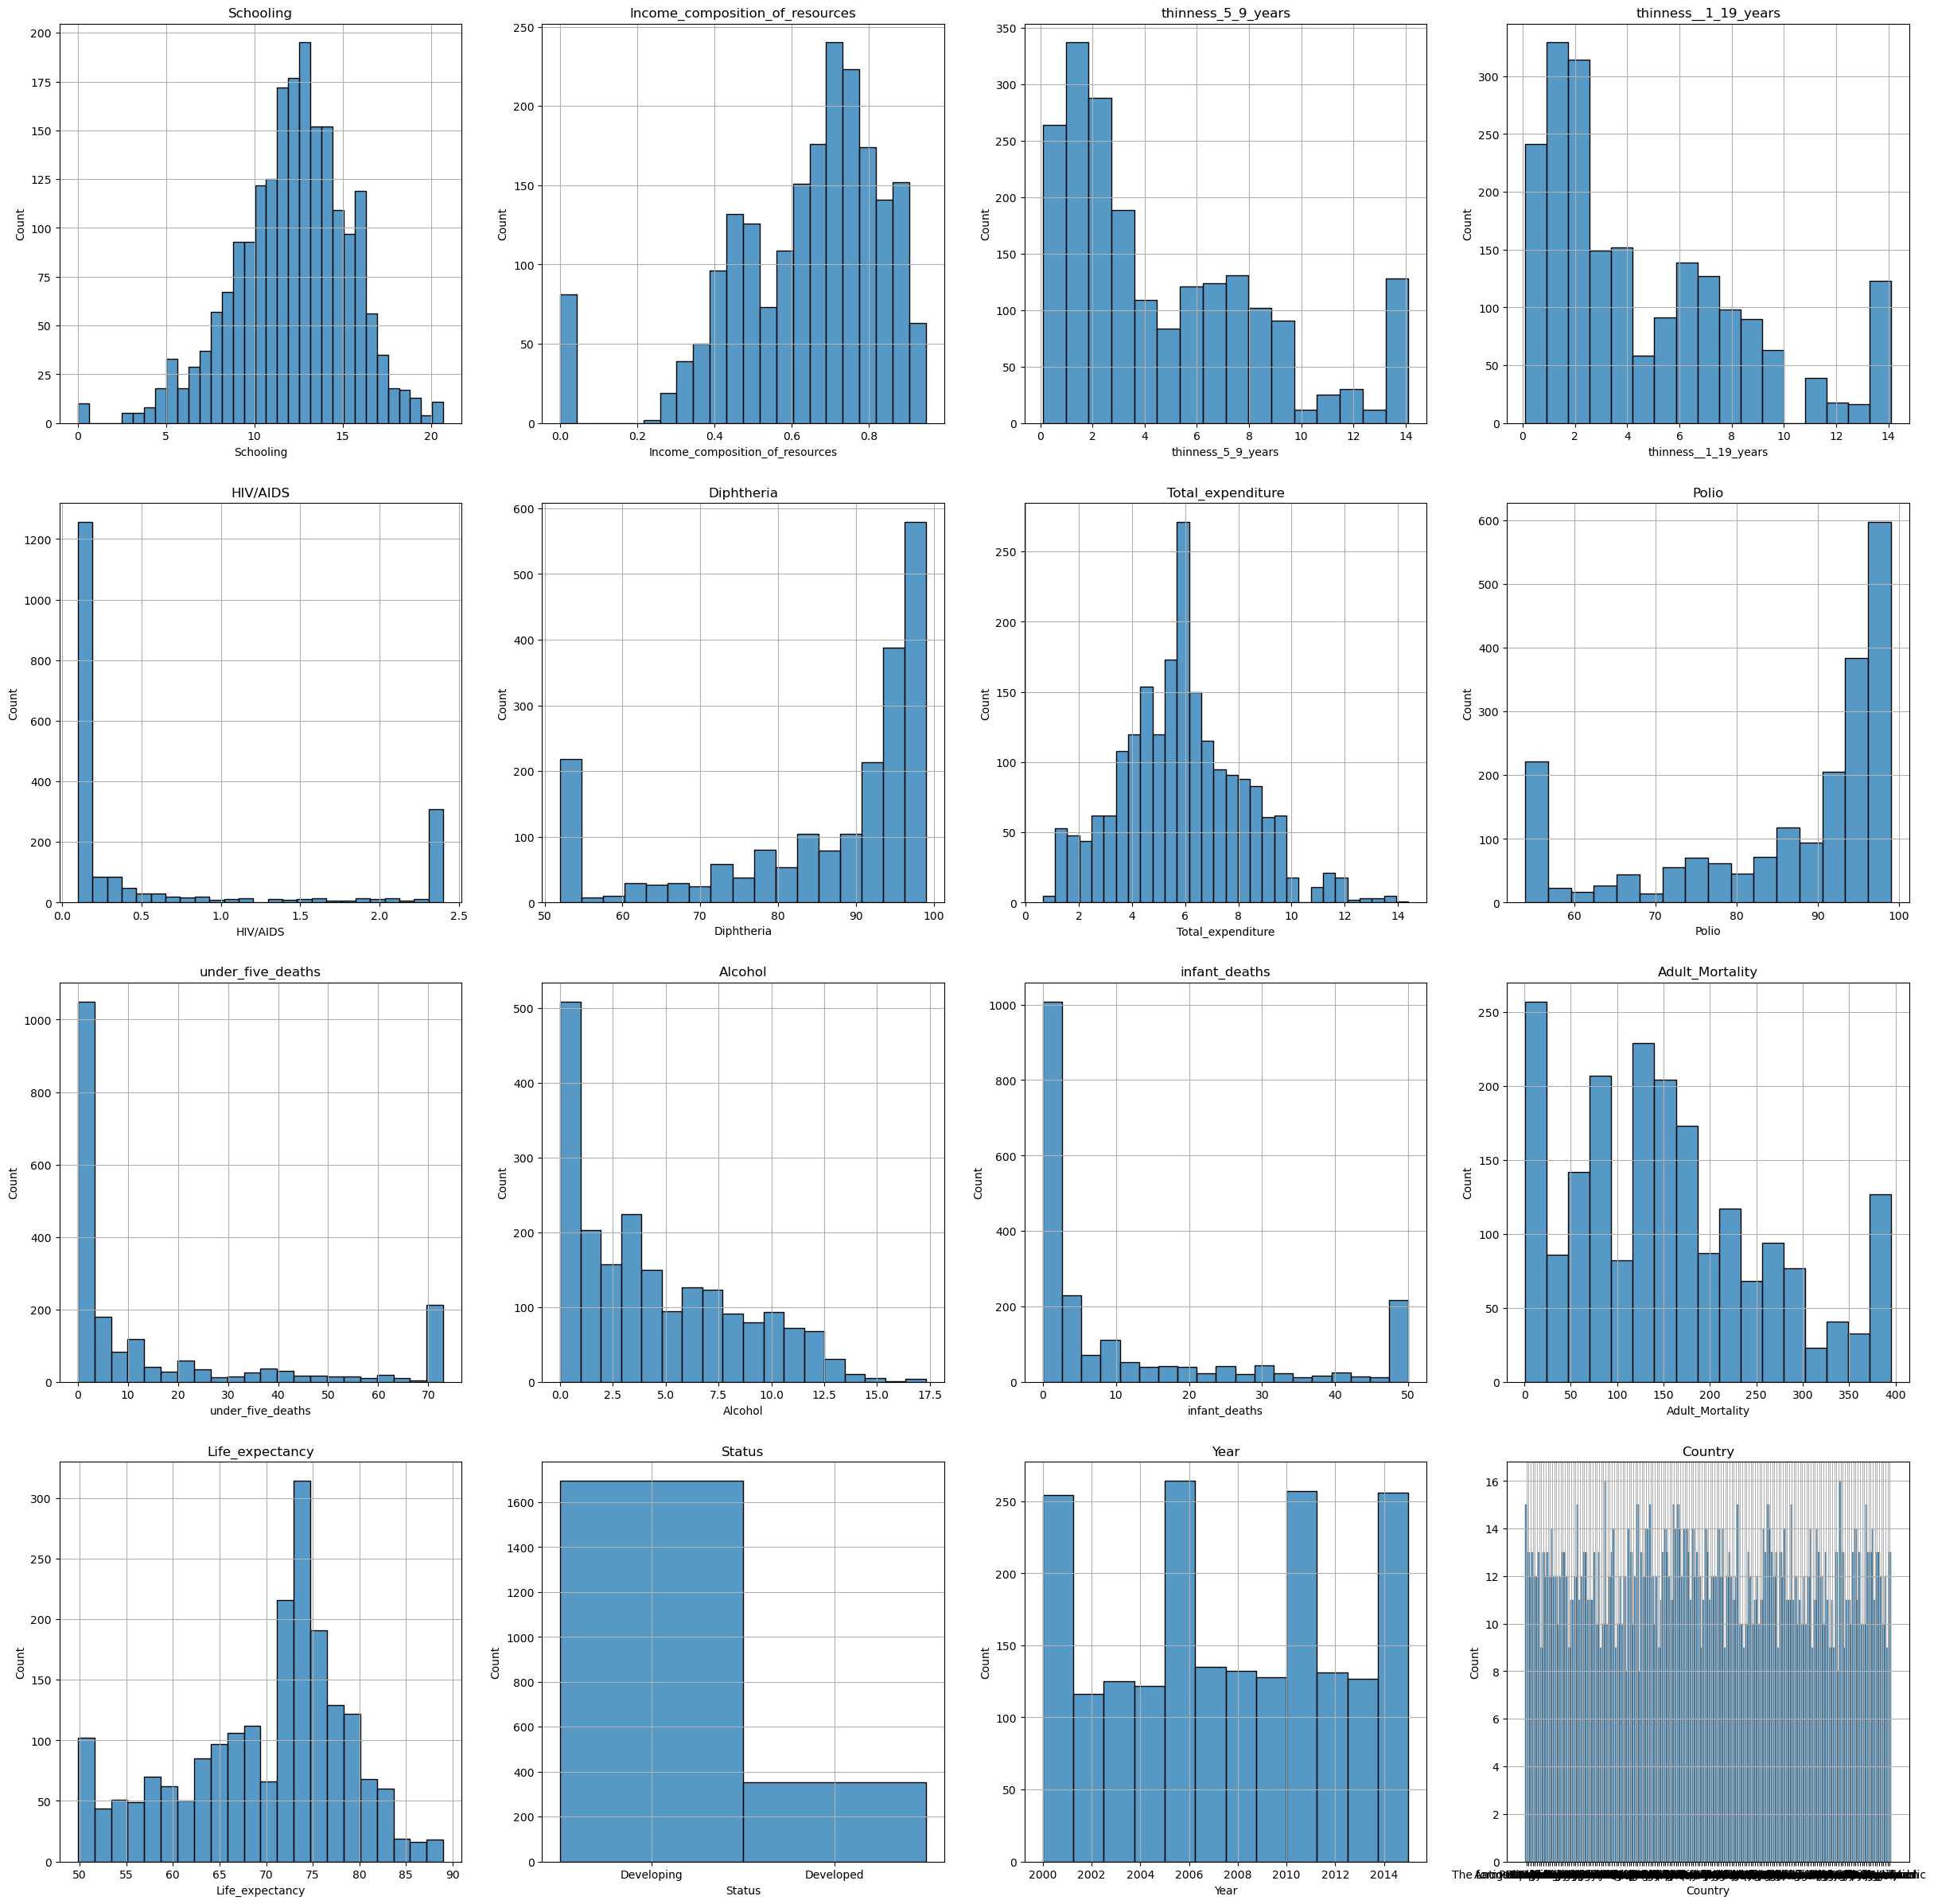

In [45]:
#Create a function to plot the histograms
def plot_histogram(df, col_names):
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(30,30))
    for i in range(4):
        for j in range(4):
            if len(col_names) > 0:
                col_name = col_names.pop()
            else:
                break                 
            sns.histplot(ax = axes[i, j], data = df, x = col_name)
            axes[i,j].set_title(col_name)
            axes[i,j].grid(True)                
               
plot_histogram(df, list(df.columns))

# Ask some question and answer them by visualization

## 1) Does our data contain more develping countries or more developed countries?

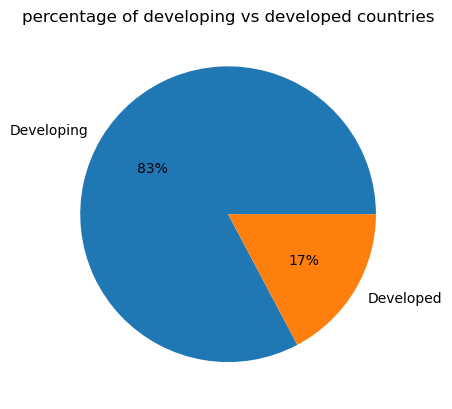

In [46]:
plt.pie(df['Status'].value_counts(), labels = df['Status'].unique(), autopct='%.0f%%')
plt.title('percentage of developing vs developed countries')
plt.show()

*conclusion* \
&rightarrow;&nbsp; As we see most of the data containg developing countries

### We will create a function to plot barchart of any column based on the Status column

In [47]:
def plot_bar_based_on_Status(col_to_compare):
    df_grouped_by_Status = df.groupby('Status')[col_to_compare].mean()
    sns.barplot(data = df_grouped_by_Status.reset_index(), x = df_grouped_by_Status.index, y = df_grouped_by_Status.values, hue = 'Status')
    plt.title('Average {} in Developing vs. Developed Countries'.format(col_to_compare))
    plt.ylabel('Average of {}'.format(col_to_compare))
    plt.show()

## 2) Does the average of the life expectancy vary based on the status of the country?

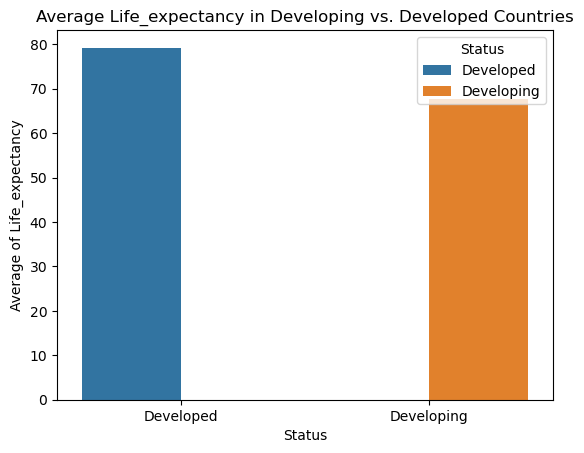

In [48]:
plot_bar_based_on_Status('Life_expectancy')

&rightarrow;&nbsp; As you can see the average of the life expectancy in the developed countries is higher which is something expected

## 3) Does the average of the life expectancy vary based on the status of the country?
`Adult Mortality`: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

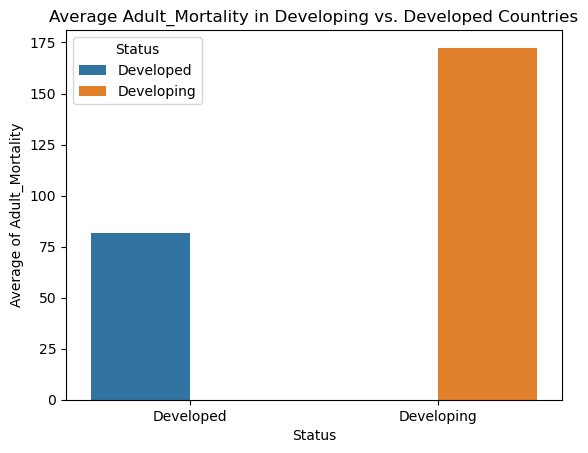

In [49]:
plot_bar_based_on_Status('Adult_Mortality')

&rightarrow;&nbsp; As you can see the average adult mortality in the developing countries is much higher than the developed countries which is something expected because Adult Mortality represent the death rate 

## 4) Does the average of the infant deaths vary based on the status of the country?

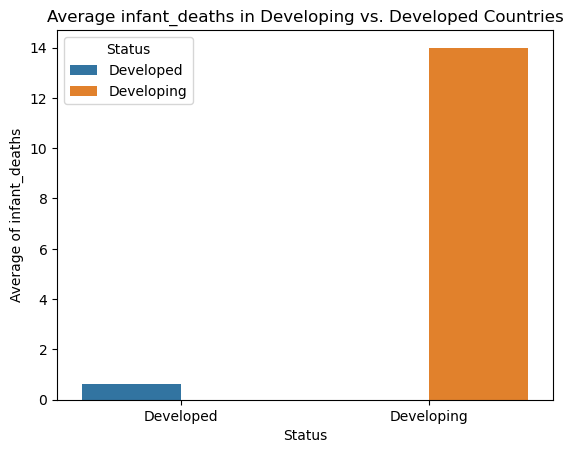

In [50]:
plot_bar_based_on_Status('infant_deaths')

&rightarrow;&nbsp; the average percentage of the infants die per 1000 in the developed countries are almost zero, on the other hand the average number of infants die in the developing countries are about 14 

## 5) Do you think Total_expenditure will be bigger in the developed countries or the developing countries?

`Total expenditure`: General government expenditure on health as a percentage of total government expenditure (%)

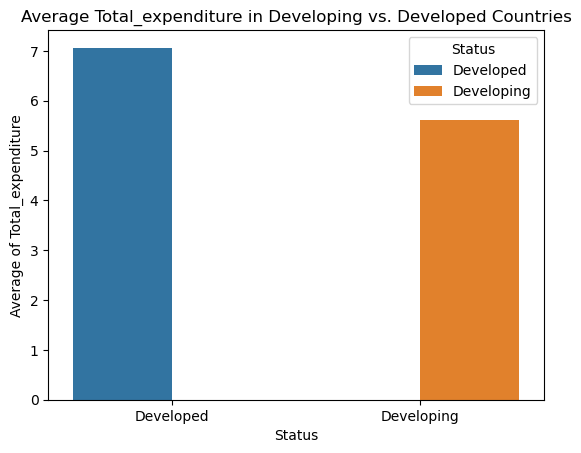

In [51]:
plot_bar_based_on_Status('Total_expenditure')

&rightarrow;&nbsp; we can coclude that the goverenment in the `developed` countries pays more money on health from it's total expendature and we can link this by why the death rate on the developed countries is small in camparison of the developing countries  

## 6) Does the average of schooling years vary based on the status of the country?

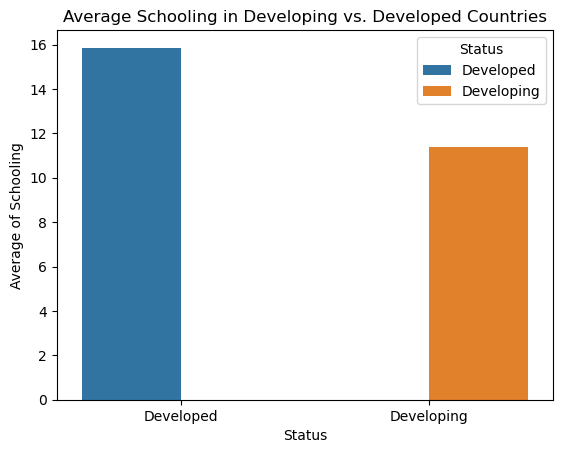

In [52]:
plot_bar_based_on_Status('Schooling')

&rightarrow;&nbsp; the average years of scooling in the developed countries is about 16 years which is much bigger than the number of years in the developing countries which equals about 11 years\
and i think that the reason for this is in the developing countries alot of students are forced to abandon their education to work and help their families

## 7) The relation between the two columns (Polio, Diphtheria) and the Life_expectancy column

`polio`: Polio (Pol3) immunization coverage among 1-year-olds (%)

In [53]:
diseases = ['Polio', 'Diphtheria']

Thses two columns representing diseases so we need to discover the effect of thwm on the Life_expectancy

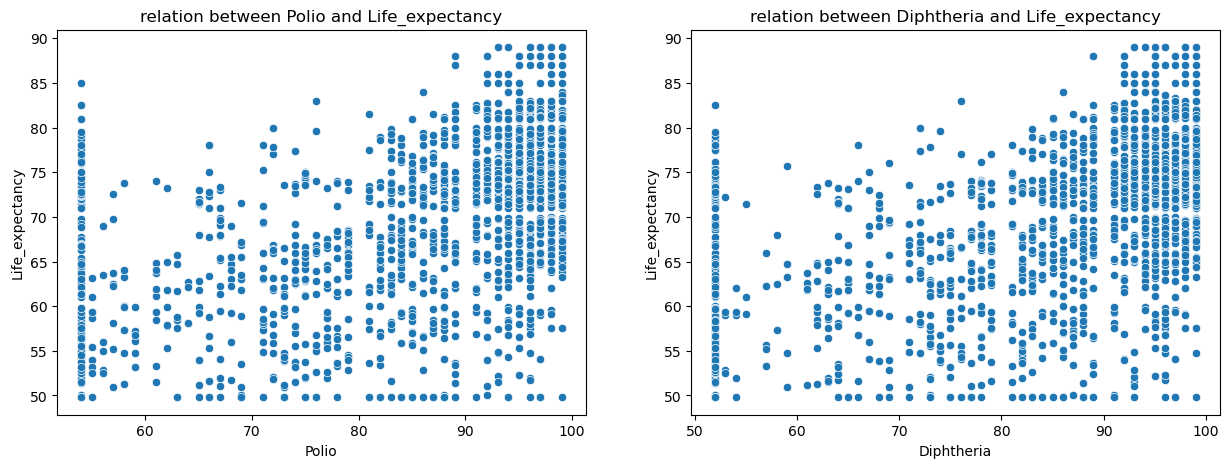

In [54]:
#sns.pairplot(df, y_vars=['Life_expectancy'], x_vars=diseases, height=8)
fig, axes = plt.subplots(1, 2, figsize = (15,5))
sns.scatterplot(ax = axes[0], data = df, x = 'Polio', y = 'Life_expectancy')
sns.scatterplot(ax = axes[1], data = df, x = 'Diphtheria', y = 'Life_expectancy')
axes[0].set_title('relation between Polio and Life_expectancy')
axes[1].set_title('relation between Diphtheria and Life_expectancy')
plt.show()

* As shown in the Polio scatter plot when the percentage of children immunized by polio increases the life expectancy increases too
* the same thing for the Diphtheria

## 8) Does the number of countries vary per year?

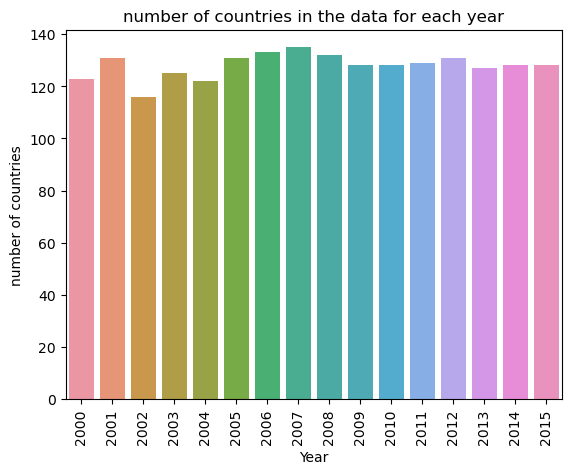

In [55]:
df = df.sort_values(by='Year')
sns.countplot(data = df, x = 'Year')
plt.xticks(rotation = 90)
plt.title('number of countries in the data for each year')
plt.ylabel('number of countries')
plt.show()

*conclusion* \
&rightarrow;&nbsp; in each year from 2000 to 2015 number of countries we use in our data are all close which equals 125 country \
&rightarrow;&nbsp; so the answer is no, the number of countris doesn't vary too much

## 9) show how the life expectancy change over years 

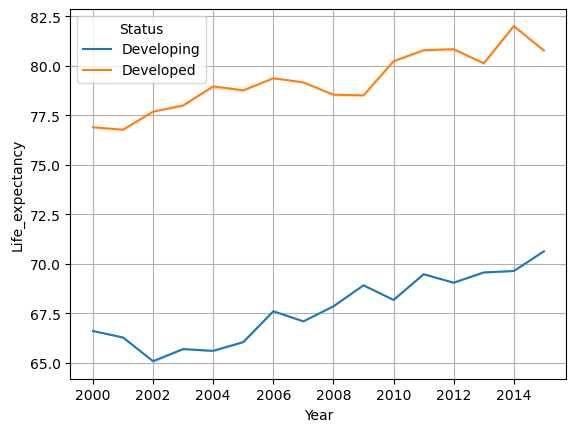

In [56]:
sns.lineplot(data = df, x = 'Year', y = 'Life_expectancy', hue = 'Status', errorbar=('ci', False))
plt.grid(True)
plt.show()

&rightarrow;&nbsp; As shown the life expectancy increases over years regardless of the status of the country

In [57]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'under_five_deaths', 'Polio',
       'Total_expenditure', 'Diphtheria', 'HIV/AIDS', 'thinness__1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [58]:
#Create a map where each country is colered according to it's life expectancy
import plotly.express as px

fig = px.choropleth (df, locations="Country", locationmode="country names", color="Life_expectancy", color_continuous_scale=px.colors.sequential.Plasma)

# Set the width and height of the graph to None
#By setting the width and height parameters to None, Plotly will automatically 
#adjust the size of the graph to fit the available space.
fig.update_layout(width=None, height=None)
fig.show ()

# let's dive into ML algorithms

In [59]:
#tace a deep copy from the original df so if we modify in the cleaned_df the original df will not affected
cleaned_df = df.copy(deep=True)
cleaned_df.head()

Country  Year      Status  Life_expectancy  Adult_Mortality  \
870         Rwanda  2000  Developing             49.8            395.0   
2034   Philippines  2000  Developing             66.8            219.0   
2028       Tunisia  2000  Developing             72.9            112.0   
953   Sierra Leone  2000  Developing             49.8            395.0   
948    Netherlands  2000   Developed             78.1             84.0   

      infant_deaths  Alcohol  under_five_deaths  Polio  Total_expenditure  \
870              34     7.13                 57   54.0               4.22   
2034             50     4.73                 73   74.0               3.21   
2028              4     1.21                  5   97.0               5.40   
953              29     3.97                 48   54.0              13.63   
948               1    10.06                  1   97.0               7.42   

      Diphtheria  HIV/AIDS  thinness__1_19_years  thinness_5_9_years  \
870         52.0       2.4                   7.6                 7.7   
2034        78.0       0.1                   1.0                 9.6   
2028        97.0       0.1                   6.6                 6.5   
953         52.0       1.2                   1.3                 1.4   
948         97.0       0.1                   1.1                 1.1   

      Income_composition_of_resources  Schooling  
870                             0.318        6.6  
2034                            0.618       11.4  
2028                            0.646       12.8  
953                             0.292        6.7  
948                             0.873       16.5

In [60]:
cleaned_df.shape

(2047, 16)

We have to categorical columns which are (`Country`, `Status`) \
so we will remove the country column and encode the Status column

In [61]:
cleaned_df.Status.unique()

array(['Developing', 'Developed'], dtype=object)

In [62]:
cleaned_df.drop(['Country'], axis = 1, inplace = True)

cleaned_df = pd.get_dummies(cleaned_df, columns = ['Status'], dtype = int)

cleaned_df.head()

Year  Life_expectancy  Adult_Mortality  infant_deaths  Alcohol  \
870   2000             49.8            395.0             34     7.13   
2034  2000             66.8            219.0             50     4.73   
2028  2000             72.9            112.0              4     1.21   
953   2000             49.8            395.0             29     3.97   
948   2000             78.1             84.0              1    10.06   

      under_five_deaths  Polio  Total_expenditure  Diphtheria  HIV/AIDS  \
870                  57   54.0               4.22        52.0       2.4   
2034                 73   74.0               3.21        78.0       0.1   
2028                  5   97.0               5.40        97.0       0.1   
953                  48   54.0              13.63        52.0       1.2   
948                   1   97.0               7.42        97.0       0.1   

      thinness__1_19_years  thinness_5_9_years  \
870                    7.6                 7.7   
2034                   1.0                 9.6   
2028                   6.6                 6.5   
953                    1.3                 1.4   
948                    1.1                 1.1   

      Income_composition_of_resources  Schooling  Status_Developed  \
870                             0.318        6.6                 0   
2034                            0.618       11.4                 0   
2028                            0.646       12.8                 0   
953                             0.292        6.7                 0   
948                             0.873       16.5                 1   

      Status_Developing  
870                   1  
2034                  1  
2028                  1  
953                   1  
948                   0

### split the df into train data and test data

In [63]:
train_df = cleaned_df.iloc[:1632, :] 
test_df = cleaned_df.iloc[1632:, :] #test will be about 20% of our cleaned_df 

print('shape of the train_df: {}\nshape of the train_df: {}'.format( train_df.shape, test_df.shape))

shape of the train_df: (1632, 16)
shape of the train_df: (415, 16)


In [64]:
## defining our features (x) and target column (y)

x=train_df.loc[:,~train_df.columns.isin(["Life_expectancy"])]
y=train_df.Life_expectancy

x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2, random_state=42)
print(x_train.shape,y_train.shape,x_val.shape,y_val.shape)

(1305, 15) (1305,) (327, 15) (327,)


In [65]:
x_train.head()

Year  Adult_Mortality  infant_deaths  Alcohol  under_five_deaths  Polio  \
763   2000            149.0              4     0.54                  5   98.0   
1048  2006             89.0              1     0.01                  1   99.0   
1341  2009            166.0              0     2.83                  0   99.0   
1872  2008            122.0              8     0.80                  9   83.0   
1348  2012            217.0             50     5.02                 71   88.0   

      Total_expenditure  Diphtheria  HIV/AIDS  thinness__1_19_years  \
763                3.40        98.0       0.1                   9.8   
1048               2.25        99.0       0.1                   3.2   
1341               4.97        99.0       0.1                   7.3   
1872               3.40        79.0       0.1                   6.4   
1348               4.46        88.0       0.1                   1.0   

      thinness_5_9_years  Income_composition_of_resources  Schooling  \
763                  9.6                            0.715       11.6   
1048                 3.1                            0.787       14.1   
1341                 7.3                            0.734       13.8   
1872                 6.2                            0.651       11.6   
1348                 9.7                            0.666       11.6   

      Status_Developed  Status_Developing  
763                  0                  1  
1048                 0                  1  
1341                 0                  1  
1872                 0                  1  
1348                 0                  1

In [66]:
x_val.head()

Year  Adult_Mortality  infant_deaths  Alcohol  under_five_deaths  Polio  \
43    2005            222.0              0    12.30                  0   93.0   
1151  2012             96.0              1     4.16                  1   98.0   
709   2004             68.0              3     7.70                  4   97.0   
1115  2004             12.0              0     2.07                  0   95.0   
1977  2006            161.0              5     3.23                  6   94.0   

      Total_expenditure  Diphtheria  HIV/AIDS  thinness__1_19_years  \
43                 5.83        94.0       0.1                   3.0   
1151               8.59        99.0       0.1                   3.4   
709                8.30        99.0       0.1                   1.7   
1115               8.64        94.0       0.1                   2.6   
1977               7.63        95.0       0.8                   2.4   

      thinness_5_9_years  Income_composition_of_resources  Schooling  \
43                   3.1                            0.798       16.2   
1151                 3.2                            0.778       15.7   
709                  1.4                            0.866       14.8   
1115                 2.6                            0.000       11.9   
1977                 2.4                            0.583       10.8   

      Status_Developed  Status_Developing  
43                   1                  0  
1151                 0                  1  
709                  1                  0  
1115                 0                  1  
1977                 0                  1

In [67]:
def build_gridsearch(model):
    '''
    build a Gridsearch object on a pipeline with scaler and PCA and input model 
    
    Args:
    model : unfitted regressor 
    
    returns:
    gcv: sklearn gridsearch object on pipeline with scaler,PCA and inputted model
    '''
    pipeline=Pipeline(steps=[
        ("scaler",StandardScaler()),
        ("PCA",PCA(0.95)),
        ("model",model)##0.95 choosese n_components that preserve 95% of variance
    ])

    #Define parameter grid that specifies the different values that we want 
    #to try for each step in the pipeline 
    param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    "PCA":["passthrough",PCA(0.95)],
    "model":[model]}
    gcv=GridSearchCV(pipeline, param_grid, cv=3, scoring='r2',verbose=0)
    
    return gcv 

def describe_preds(y_true,y_pred,model_name):
    
    '''
    visualise via histogram and describe distribution between predicted values and true values 
    '''
    plt.clf()
    plt.hist(y_true,color="SteelBlue",label="True Values", alpha = 0.3)
    plt.hist(y_pred,color="Crimson",label="Predictions", alpha = 0.3)
    plt.title(model_name)
    plt.legend()
    plt.show()
    print(f"True Values {np.mean(y_true):.2f} +/- {np.std(y_true):.2f}")
    print(f"Predictions {np.mean(y_pred):.2f} +/- {np.std(y_pred):.2f}")

## explanation for the previous cell
we define a function called build_gridsearch that takes a model as an argument and returns a grid search object that can be used to find the best parameters for the model. The function does the following steps:

- It creates a pipeline object that consists of three steps: a scaler, a PCA, and the model. A pipeline is a way of chaining together different steps in a machine learning workflow, such as preprocessing, dimensionality reduction, and modeling. A scaler is an object that transforms the data by scaling each feature to a given range or standardizing it by removing the mean and scaling to unit variance. A PCA is an object that performs principal component analysis, which is a technique for reducing the dimensionality of the data by projecting it onto a lower-dimensional subspace that preserves most of the variance. The model is the regressor that we want to fit to the data, such as linear regression, random forest, or neural network.
- It defines a parameter grid that specifies the different values that we want to try for each step in the pipeline. For example, we can try two different scalers: StandardScaler and MinMaxScaler. We can also try two different options for PCA: "passthrough", which means no dimensionality reduction, and PCA(0.95), which means choosing the number of components that preserve 95% of the variance. We can also try different values for the hyperparameters of the model, such as learning rate, number of trees, or number of hidden layers.
- It creates a grid search object that takes the pipeline, the parameter grid, and some other arguments as inputs. A grid search object is a way of performing an exhaustive search over the parameter space and finding the best combination of parameters that minimizes a given scoring function. In this case, we use neg_mean_absolute_error as the scoring function, which is the negative of the average absolute difference between the predicted and true values. We also use cv=3, which means we use 3-fold cross-validation to evaluate each combination of parameters. Cross-validation is a technique for splitting the data into training and validation sets multiple times and averaging the scores across them. We also use verbose=0, which means we do not print any messages during the search process.
- It returns the grid search object, which can be used to fit the data and get the best parameters and score.

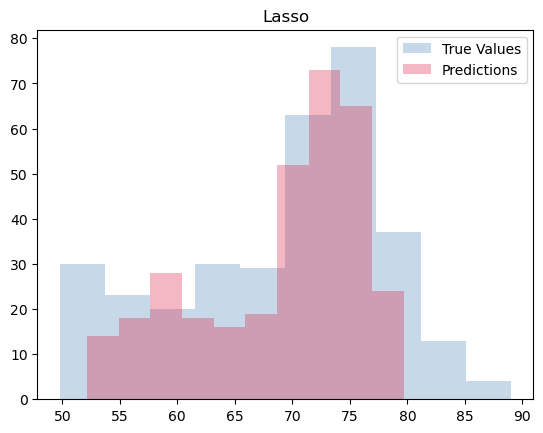

True Values 69.05 +/- 9.19
Predictions 69.07 +/- 7.00
 accuracy on train  0.83
 accuracy on validation  0.82 

(best params were: {'PCA': 'passthrough', 'model': Lasso(), 'scaler': StandardScaler()})


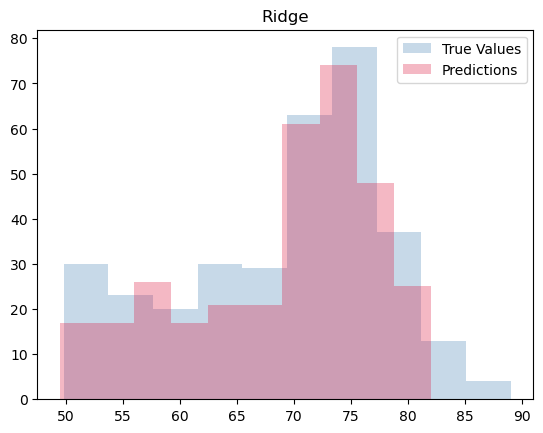

True Values 69.05 +/- 9.19
Predictions 69.06 +/- 8.28
 accuracy on train  0.85
 accuracy on validation  0.85 

(best params were: {'PCA': 'passthrough', 'model': Ridge(), 'scaler': StandardScaler()})


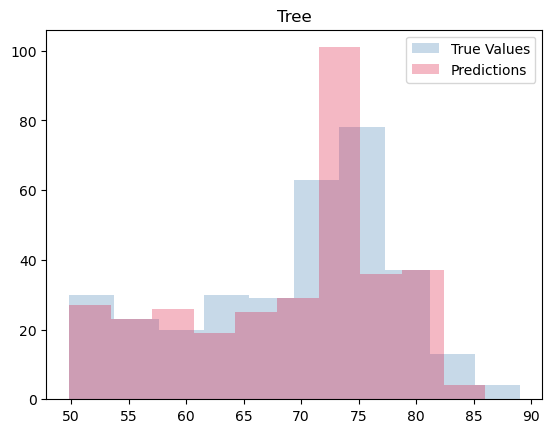

True Values 69.05 +/- 9.19
Predictions 68.83 +/- 9.15
 accuracy on train  1.0
 accuracy on validation  0.9 

(best params were: {'PCA': 'passthrough', 'model': DecisionTreeRegressor(), 'scaler': StandardScaler()})


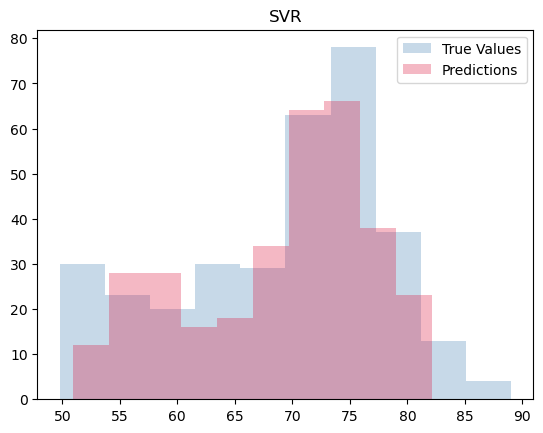

True Values 69.05 +/- 9.19
Predictions 69.11 +/- 7.78
 accuracy on train  0.9
 accuracy on validation  0.86 

(best params were: {'PCA': 'passthrough', 'model': SVR(), 'scaler': StandardScaler()})


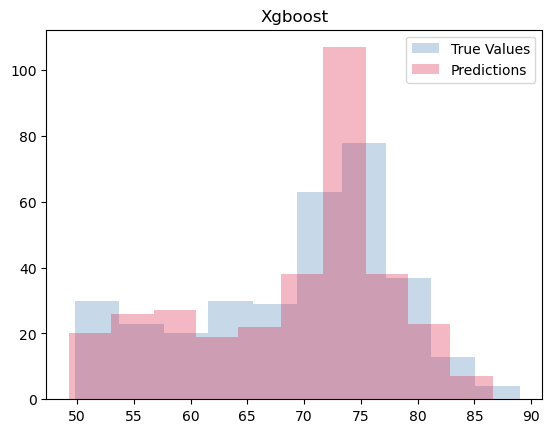

True Values 69.05 +/- 9.19
Predictions 69.04 +/- 8.73
 accuracy on train  1.0
 accuracy on validation  0.94 

(best params were: {'PCA': 'passthrough', 'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), 'scaler': StandardScaler()})


In [68]:
## trying out different models with different combinations with PCA and scaler let us see what model performs best 

models={"Lasso":Lasso(),"Ridge":Ridge(),
       "Tree":DecisionTreeRegressor(),"SVR":SVR(),"Xgboost":XGBRegressor()}

r2_train = {}
r2_val = {}

for name,model in models.items():
    gcv=build_gridsearch(model)
    gcv.fit(x_train, y_train)
    
    preds_train = gcv.predict(x_train)
    preds_val = gcv.predict(x_val)
    describe_preds(y_val,preds_val,name)

    r2_train[name] = r2_score(y_train, preds_train)
    r2_val[name] = r2_score(y_val, preds_val)
    
    print(" accuracy on train ", round(r2_train[name], 2))
    print(" accuracy on validation ", round(r2_val[name], 2), '\n') 
    
    print(f"(best params were: {gcv.best_params_})")
    

*observations*:
* the best parameters for all the models when we passthrough the PCA and that's because out dataframe doesn't has alot \ of features they are only 15 
* decision Tree and Xgboost is overfitting
* Lasso and Ridge performed well 
* SVR performed pretty well

the conclusion is the SVR is the best algorithm tp predict the life_expectancy

In [69]:
## further tuning 

pipeline=Pipeline(steps=[
        ("scaler",StandardScaler()),
        ("PCA",PCA(0.95)),
        ("model",SVR())##0.95 choosese n_components that preserve 95% of variance
    ])
## feel free to search over pca and scaler again 
## but for the the sake of time let us search over only the SVR parameters
param_grid = {
    'scaler': [ MinMaxScaler()],
    "model__C":[0.001,0.01,1,10,100,1000]}
rcv=RandomizedSearchCV(pipeline, param_grid, n_iter=10,cv=3, scoring='neg_mean_absolute_error',verbose=100)

In [70]:
rcv.fit(x_train, y_train)

preds_train = rcv.predict(x_train)
preds_val = rcv.predict(x_val)

    
print(" accuracy on train ", round(r2_score(y_train, preds_train), 2))
print(" accuracy on validation ", round(r2_score(y_val, preds_val), 2)) 

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3; 1/6] START model__C=0.001, scaler=MinMaxScaler().......................
[CV 1/3; 1/6] END model__C=0.001, scaler=MinMaxScaler();, score=-6.961 total time=   0.0s
[CV 2/3; 1/6] START model__C=0.001, scaler=MinMaxScaler().......................
[CV 2/3; 1/6] END model__C=0.001, scaler=MinMaxScaler();, score=-7.536 total time=   0.0s
[CV 3/3; 1/6] START model__C=0.001, scaler=MinMaxScaler().......................
[CV 3/3; 1/6] END model__C=0.001, scaler=MinMaxScaler();, score=-7.029 total time=   0.0s
[CV 1/3; 2/6] START model__C=0.01, scaler=MinMaxScaler()........................
[CV 1/3; 2/6] END model__C=0.01, scaler=MinMaxScaler();, score=-6.560 total time=   0.0s
[CV 2/3; 2/6] START model__C=0.01, scaler=MinMaxScaler()........................
[CV 2/3; 2/6] END model__C=0.01, scaler=MinMaxScaler();, score=-7.128 total time=   0.0s
[CV 3/3; 2/6] START model__C=0.01, scaler=MinMaxScaler()........................
[CV 3/

In [71]:
print('The accuracy on train goes from (90 %) to  (96 %)')
print('The accuracy on train goes from (86 %) to  (91 %)')

The accuracy on train goes from (90 %) to  (96 %)
The accuracy on train goes from (86 %) to  (91 %)


## It's time to use the test_df 

In [72]:
x_test = test_df.loc[:,~train_df.columns.isin(["Life_expectancy"])]
y_test = test_df.Life_expectancy

In [73]:
preds_test = rcv.predict(x_test)
print('r2_score of test', r2_score(y_test, preds_test))

r2_score of test 0.8722438771061294


# The End

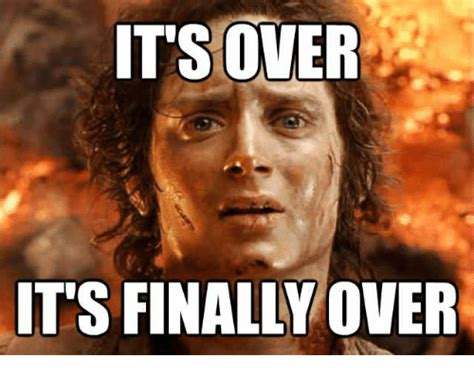

In [74]:
from IPython.display import Image

Image(filename='C:\\Sohayb\\jupyter\\End-to-End Data Science Workshop\\PROJECT\\finally_image.jpeg')